In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
data_path = 'processed.cleveland.data'

# Counting how many rows have a missing value
count = 0
with open(data_path) as file:
    for line in file.readlines():
        if '?' in line:
            count += 1
print(count)

# Rows with missing values won't be included in the data
n_patients = 297
n_features = 14

6


In [159]:
from collections import deque
def load_data(data_path, n_patients, n_features):
    '''
    Load heart disease data from file and return it in numpy array
    @param data_path: the path of the file
    @param n_patients: the number of instances without missing values
    @param n_features: the number of features in the dataset
    @return: formatted data in ndarray of [patient, feature]
    '''
    lists = deque()
    with open(data_path) as file:
        for line in file.readlines():
            if '?' not in line:
                features = line.split(',')
                features[-1] = features[-1][0]
                features = [float(feature) for feature in features]
                lists.append(features)
    data = np.array(lists, dtype=np.float32)
    return data

In [160]:
data = load_data(data_path, n_patients, 14)

In [161]:
df = pd.DataFrame(data, columns=range(14))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1.0
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2.0
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3.0


In [179]:
X = np.array(df.iloc[:, :13])
y = np.array(df.iloc[:, 13])

In [180]:
'''
Indicator = 1 because only 0 value indicates that heart disease is abscent while 
1<= indicates that heart disease is precesnce to some degree
'''
indicator = 1
y[y >= indicator] = 1
y[y < indicator] = 0

n_abs = (y == 0).sum()
n_pre = (y == 1).sum()
print(f'{n_abs} patients with abscense of disease and {n_pre} patients with presence of disease')

160 patients with abscense of disease and 137 patients with presence of disease


In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
print(f'y_train shape: {y_train.shape}, y_test shape: {y_test.shape}')

y_train shape: (237,), y_test shape: (60,)


In [165]:
from sklearn.naive_bayes import MultinomialNB

# alpha - smoothing factor
clf = MultinomialNB(alpha=1.0, fit_prior=True)
clf.fit(X_train, y_train)

MultinomialNB()

In [166]:
pred_prob = clf.predict_proba(X_test)
print(pred_prob[:6])

[[1.62617094e-03 9.98373829e-01]
 [1.37782966e-02 9.86221703e-01]
 [9.95538738e-01 4.46126186e-03]
 [9.98390259e-01 1.60974105e-03]
 [9.72042309e-04 9.99027958e-01]
 [9.95350041e-01 4.64995928e-03]]


In [167]:
pred = clf.predict(X_test)
print(pred[:6])

[1. 1. 0. 0. 1. 0.]


In [168]:
accuracy = clf.score(X_test, y_test)
print(f'The accuracy = {accuracy*100:.1f}%')

The accuracy = 78.3%


In [169]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred, labels=[0, 1]))

[[24  4]
 [ 9 23]]


In [170]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f'precision_score: {precision_score(y_test, pred, pos_label=1)}')
print(f'recall_score: {recall_score(y_test, pred, pos_label=1)}')
print(f'f1_score: {f1_score(y_test, pred, pos_label=1)}')

precision_score: 0.8518518518518519
recall_score: 0.71875
f1_score: 0.7796610169491525


In [171]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79        28
         1.0       0.85      0.72      0.78        32

    accuracy                           0.78        60
   macro avg       0.79      0.79      0.78        60
weighted avg       0.79      0.78      0.78        60



In [172]:
pos_prob = pred_prob[:, 1]
thresholds = np.arange(0.0, 1.1, 0.05)
true_pos, false_pos = [0]*len(thresholds), [0]*len(thresholds)
for pred, y in zip(pos_prob, y_test):
    for i, threshold in enumerate(thresholds):
        if pred >= threshold:
            if y == 1:
                true_pos[i] += 1
            else:
                false_pos[i] += 1
        else:
            break

In [173]:
n_pos_test = (y_test == 1).sum()
n_neg_test = (y_test == 0).sum()
true_pos_rate = [tp/n_pos_test for tp in true_pos]
false_pos_rate = [fp/n_neg_test for fp in false_pos]

Text(0.5, 1.0, 'ROC curve')

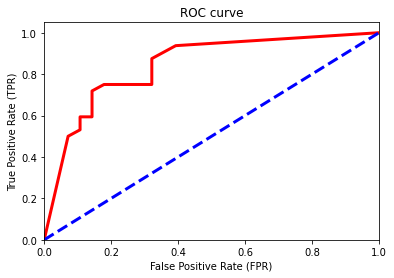

In [174]:
plt.plot(false_pos_rate, true_pos_rate, color='red', linewidth=3)
plt.plot([0, 1], [0, 1], color='blue', linewidth=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve")

In [175]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pos_prob)

0.8549107142857143

In [176]:
from sklearn.model_selection import StratifiedKFold

k_fold = StratifiedKFold(n_splits=5)

In [177]:
smoothing_factor_option = [1, 2, 3, 4, 5]
fit_prior_option = [True, False]
auc_record = {}

In [182]:
for train_indices, test_indices in k_fold.split(X, y):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    for alpha in smoothing_factor_option:
        if alpha not in auc_record:
            auc_record[alpha] = {}
        for fit_prior in fit_prior_option:
            clf = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
            clf.fit(X_train, y_train)
            pred_prob = clf.predict_proba(X_test)
            pos_prob = pred_prob[:, 1]
            auc = roc_auc_score(y_test, pos_prob)
            auc_record[alpha][fit_prior] = auc + auc_record[alpha].get(fit_prior, 0.0)


In [183]:
for smoothing, smoothing_record in auc_record.items():
    for fit_prior, auc in smoothing_record.items():
        print(f'{smoothing}    {fit_prior}    {auc/5:.5f}')

1    True    0.85805
1    False    0.85805
2    True    0.85760
2    False    0.85760
3    True    0.85692
3    False    0.85692
4    True    0.85669
4    False    0.85669
5    True    0.85623
5    False    0.85623


In [184]:
clf = MultinomialNB(alpha=1.0, fit_prior=False)
clf.fit(X_train, y_train)
pos_prob = clf.predict_proba(X_test)[:, 1]
print(f'AUC with the best parameters: {roc_auc_score(y_test, pos_prob)}')

AUC with the best parameters: 0.8171296296296295


In [185]:
clf.score(X_test, y_test)

0.7288135593220338